<a href="https://colab.research.google.com/github/tpyte001/comput_phy/blob/main/Draft_CometGroupProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part one of project, cometary orbit with fixed step size

In [ ]:
# UNITS
# We will use SI units with large intervals of time for steps
# x(0),y(0),Vx(0),Vy(0) meters / second ** 2
# Mass of the Sun: 1.989 x 10 ** 30 Kilograms
# Gravitational Constant: 6.67430 * 10 ** (-11) Newtons * meter ** 2 / kilogram**(-2)

# initial values
x = 4*(10**9)  # km
y = 0          # km
vx = 0         # m/s
vy = 500       # m/s

M = 1.9989e30     # kg # M = mass of sun
G = 6.67430e-11   # N*m**2/kg**2 # G = Newtons gravitational constant

def f(rvec, t):
  """
  description:
  f(rvec,t) function returns the force vector, this function is to be used within function rk4fixed()
  computes force vector (fvec) of cometary orbit using x and y components 
  """
  
  x = rvec[0]
  y = rvec[1]
  vx = rvec[2]
  vy = rvec[3]
  r = (x**2 + y**2)**0.5
  f_x = vx
  f_y = vy
  f_vx = -G*M*(x/r**3)
  f_vy = -G*M*(y/r**3)
  fvec = np.array([f_x, f_y, f_vx, f_vy], float)
  return fvec
 

def rk4fixed(a,b,N):
  """
  description:
  rk4fixed(a,b,N) uses the runge-kutta method to compute a cometary orbit around the sun with static step size
  
  calls f(rvec,t), which computes the force vector of orbit defined outside of rk4fixed(a,b,N)
  rk4fixed(a,b,N) uses the runge kutta method parameters input into f(rvec, t), updates rvec, and appends
  each iteration of rvec [x,y,vx,vy] into a list for plotting
  """
  rvec = [x,y,vx,vy]
  
  h = (b-a)/N
  tlist = np.arange(a,b,h)
  xlist = []
  ylist = []
  vxlist = []
  vylist = []
  for t in tlist:
    xlist.append(rvec[0])
    ylist.append(rvec[1])
    vxlist.append(rvec[2])
    vylist.append(rvec[3])
  
    k1 = h * f(rvec,t) 
    k2 = h * f(rvec + (k1/2), t + (h/2))
    k3 = h * f(rvec + (k2/2), t + (h/2))
    k4 = h * f(rvec + k3, t+h)
    rvec = rvec + (1/6)*(k1 + (2*k2) + (2*k3) + k4)

  return(xlist, ylist, vxlist, vylist)





Part 2 of project, cometary orbit with adaptive scheme

#Next step:
#implement adaptive method from t=a to t=b with a target accuracy given by delta km/year

The main idea is that after given an initial time step h, and specifying a maximum allowed error,
the RK algorithm computes the ideal step size to use.

For adaptive integration, our h is going to vary, so instead of specifying a constant time interval,
a single initial time interval is chosen. That time interval is then used to find the error. We specify
and error tolernce, i.e. a maximum allowed error, and the time interval h is increased or decreased 
depending on wether or not our actual error is greater than our error tolernace.

We specify this error tolerance to the algorithm,
which then computes the ideal step size to use.

Process:
- Choose a very small initial value of h
- do two steps of RK method, each of size h, get estimate of x1(t + 2h)
- go back to t initial, do step of 2h, get estimate of x2(t + 2h)
- comparing these two values gives the error, and allows the algorithm to calculate
  the ideal step size from that error. we find:
  Ideal step size h' = h*(rho)^1/4 where (rho) = 30 h * delta / |x1(t+2h) - x2(t+2h)|
  where delta is our error tolerance
- if rho > 1. we keep results and move onto time t+2h
- if rho < 1. we need to repeat the current step to recalculate h'
"""


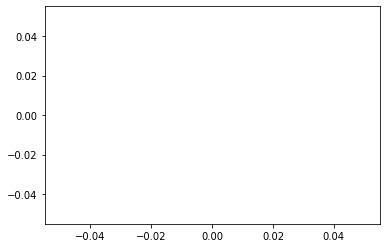

In [23]:
import numpy as np
import matplotlib.pyplot as plt


#initial values

x = 4*(10**9)  # km
y = 0          # km
vx = 0         # m/s
vy = 500       # m/s

M = 1.9989e30     # kg # M = mass of sun
G = 6.67430e-11   # N*m**2/kg**2 # G = Newtons gravitational constant

# our 4 functions, derived from original differential vector equation
def f(rvec, t): 
  x = rvec[0]
  y = rvec[1]
  vx = rvec[2]
  vy = rvec[3]
  r = (x**2 + y**2)**0.5
  f_x = vx
  f_y = vy
  f_vx = -G*M*(x/r**3)
  f_vy = -G*M*(y/r**3)
  fvec = np.array([f_x, f_y, f_vx, f_vy], float)
  return fvec

# simplified RK4 Function to give initial 3 calculations in order to find error
def RK4(rvec,h):
  t = 0
  k1 = h * f(rvec,t) 
  k2 = h * f(rvec + (k1/2), t + (h/2))
  k3 = h * f(rvec + (k2/2), t + (h/2))
  k4 = h * f(rvec + k3, t+h)
  rvec = rvec + (1/6)*(k1 + (2*k2) + (2*k3) + k4)

  return(rvec)

#initial step size, delta, and radius vector list
h = 100          #initial step size
delta = 1  #km/year so delta has to be km/second?   3.154e+7 seconds/year #error tolerance? confused about this parameter
rvec = [x,y,vx,vy]    #our 4 equations

t = 0                 #t initial
t_f = 2*10*9          #t final, time for one orbit

xlist = []
ylist = []

for t in range(t,t_f):
# Error calculation:
  f0 = RK4(rvec,h) #RK4 with step size h
  f1 = RK4(f0,h)   #RK4 with step size (2h) from time t + h
  f2 = RK4(rvec, 2*h) #RK4 with step size (2h) from t = 0
  xerror = (f1[0] - f2[0])/30 # evaluates x component of error
  yerror = (f1[1] - f2[1])/30 # evaluates y component of error
  combined_error = (np.sqrt(xerror**2+yerror**2)) #combined error
  try: #prevents division by 0
    rho = 30*delta * h / combined_error
  except RuntimeWarning:
    rho = 30*h*delta/(1**-10)
  #print(rho)

  while delta < 1:
     
    if rho > 1: #our accuracy is to good, we still need to reduce h to save computation time
      h = h * (rho ** 1/4)
      x = rvec[0]
      y = rvec[1]
      vx = rvec[2]
      vy = rvec[3]
      xlist.append(x)
      xlist.append(y)
      print(h)
    if rho < 1:
      #if rho < 1: #our accuracy is poor, reevaluate from scratch with new h
      h = h * (rho ** (1/4))
      print(h)
      
plt.plot(xlist,ylist)

# Section 8.4 Mark Newman Text
## latex placeholders for now, have to make better

The basic idea behind adaptive schemes is to vary the step size h such that the error introduced per unit interval t is roughly constant

i.e. say you want an error time of 0.001 per unit time, then $t \ ϵ \ [0, 10]$ will yeild an error of $\frac{0.001}{10} \ \le \ 0.01$

We need to estimate the error on our steps, then compare that error to our required accuracy.

For the RK4 method this process is as follows:

choose an initial value of h, typically very small. In our case very small is relative to astronomical units, so h will probably be aroud 100 or 1000.

Using the vanilla RK4 $= f$ method, we evaluate two instances of the solution of step size h one after another: $f(r,h), f(f(r,h),h) \implies f_1(r, t+2h)$
and one more instance of RK4 from $t=t_o$
which yields $f_2(r,t+2h)$ where $f1$ and $f2$ will be slightly different.

getting these two function evaluations will allow us to compare them and gauge the accuracy of our calculations. since it's a 4th order method its accurate to the 4th order, with an error on the fifth order. Meaning that the size of the error per step is $ch^5$ So the error for two step sizes is double that. which implies that $f1 = f1 + 2ch^5$

when we start at $t_o$ with a single step size of $2h$ our error becomes $c(2h)^5 \ = \ 32ch^5$ which implies that $f_2 = f_2 + 32ch^5$

equating these two expressions gives $f_1 = f_2 + 30ch^5$ which implies the error per step $ϵ$ is $\frac{1}{30}(f_1-f_2)$

The quesiton to ask here is what step size would our steps have to be to make the size of the error exactly equal to the target error? we can denote this step size as $h'$, and our target error as $ϵ'$. We also have our target accuracy per unit time for our calculation as 𝛅. meaning that our target accuracy per ideal step size would be $h'𝛅$.

then, skipping the math for now, we rearrange for $h'$ then find that for a single step size:
$h' = h (\frac{30h𝛅}{|f_1-f_2|})^{1\over4} = hρ^{1\over4}$

This ratio rho is our gauge for knowing wether or not the accuracy of our RK4 steps are acceptable. 
if rho > 1, the accuracy is better than target accuracy, so the calculation is fine. for simplicities sake we can move onto the next step here, but ideally we want to recalculate h to not be wasteful. *keep results and move onto time t+2h to continue solution - (how do we represent this programatically* 

if rho < 1 then we need to repeat our current step with a smaller step size calculated by the algorithm. 

so after each step depending on rho, we either increase h and move on or decrease h and repeat. 

for the actual solution we use $f_1$

to prevent h' from diverging, we need to place an upper limit on how much h can increase from one step to the next. i.e. not more than 10% on any given pair of steps.